## Transfer Learning resnet152V2 using Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [7]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 17.3 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31644 sha256=d5c887fa9a73f2cbf32e7099d94333efb52d13084b5d63231eb4879b3c6d9ef4
  Stored in directory: /root/.cache/pip/wheels/c9/a5/cc/cb20f1314d4cdec0001fd72baa1efe93e1542a81bdea2fc639
Successfully built libarchive


In [8]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 101.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113641 sha256=e53cf82d168bb417d0c9976168095aae8d4c2e466e0f830f517dcd14ff96c5d0
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy


In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [16]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
import keras.applications.resnet
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications import ResNet152V2
#from tensorflow.keras.applications.resnet_v2.ResNet152V2
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [17]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [18]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




234545216/234545216 [==============================] - 12s 0us/step


In [19]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [20]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [21]:
len(folders)

0

In [22]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [23]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [24]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [25]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [26]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [28]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [30]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-30-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 753s 12s/step - loss: 0.6632 - accuracy: 0.9006 - val_loss: 0.0535 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 44s 727ms/step - loss: 0.5362 - accuracy: 0.9241 - val_loss: 1.0834e-05 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 43s 700ms/step - loss: 0.3970 - accuracy: 0.9411 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 43s 701ms/step - loss: 0.4009 - accuracy: 0.9559 - val_loss: 2.0234e-04 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 43s 696ms/step - loss: 0.2571 - accuracy: 0.9600 - val_loss: 4.5741e-04 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 44s 712ms/step - loss: 0.2313 - accuracy: 0.9687 - val_loss: 0.5760 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 44s 716ms/step - loss: 0.3551 - accuracy: 0.9580 - val_loss: 9.2718e-08 - val_a

In [31]:
import matplotlib.pyplot as plt

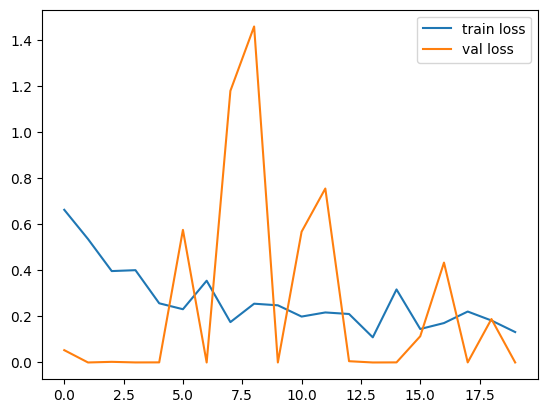

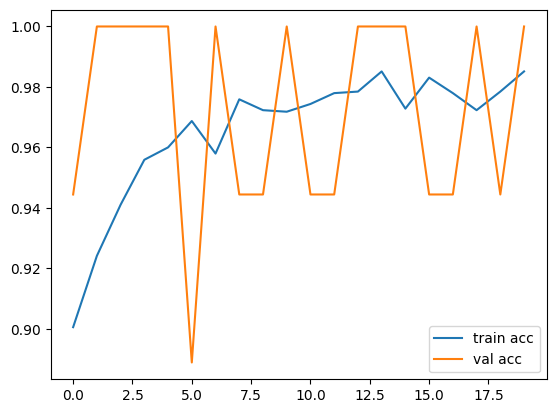

<Figure size 640x480 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [ ]:

y_pred = model.predict(test_set)


1/1 [==============================] - 5s 5s/step


In [ ]:
y_pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.2637863e-16, 9.9999976e-01, 3.0978864e-26, 2.1225513e-07],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 3.8572437e-37],
       [0.0000000e+00, 1.1856654e-21, 0.0000000e+00, 1.0000000e+00],
       [4.7449882e-26, 3.7516495e-14, 1.0000000e+00, 5.1431688e-36],
       [0.0000000e+00, 1.4692280e-26, 1.3368688e-35, 1.0000000e+00],
       [1.5893022e-30, 1.8799510e-13, 3.6080019e-29, 1.0000000e+00],
       [1.0000000e+00, 1.3344596e-34, 0.0000000e+00, 2.1276803e-36],
       [7.1215369e-22, 2.4465866e-18, 7.8392294e-20, 1.0000000e+00],
       [1.0000000e+00, 6.5333487e-36, 1.9438268e-28, 0.0000000e+00],
       [1.8634682e-17, 4.0384678e-17, 1.0000000e+00, 1.1453312e-20],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [7.8650732e-03, 1.8258181e-30, 9.9213493e-01, 8.7484533e-30],
       [1.7155552e-17, 6.9954903e-

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 0, 1, 3, 2, 3, 3, 0, 3, 0, 2, 1, 2, 3, 2, 2, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet152V2.h5')

In [ ]:
img_data

NameError: ignored

In [ ]:
img=image.load_img('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[ 86.,  84.,  71.],
        [ 83.,  85.,  72.],
        [ 77.,  75.,  62.],
        ...,
        [116.,  96.,  85.],
        [148., 128., 117.],
        [135., 115., 104.]],

       [[134., 130., 119.],
        [103., 100.,  83.],
        [ 99.,  97.,  84.],
        ...,
        [105.,  88.,  80.],
        [127., 107.,  96.],
        [127., 107.,  96.]],

       [[152., 143., 138.],
        [163., 153., 143.],
        [ 80.,  77.,  60.],
        ...,
        [112.,  95.,  87.],
        [127., 107.,  96.],
        [126., 107.,  93.]],

       ...,

       [[170., 183., 137.],
        [114., 116.,  94.],
        [ 88.,  79.,  74.],
        ...,
        [157., 139., 135.],
        [150., 135., 130.],
        [117., 106., 102.]],

       [[151., 157., 119.],
        [ 99.,  93.,  77.],
        [ 95.,  86.,  81.],
        ...,
        [133., 116., 109.],
        [116., 101.,  94.],
        [121., 110., 106.]],

       [[104.,  97.,  79.],
        [ 99.,  90.,  81.],
        [ 88.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 46ms/step


array([[5.9265411e-01, 1.2849652e-08, 1.2567539e-04, 4.0722016e-01]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 42ms/step


In [ ]:
a==1

array([False])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'